Importing Required Libraries

Importing dataset from given github link

In [522]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')

In [523]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [524]:
df.isna().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

Found missing values in almost all columns

In [525]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

Going to fill the NaN values of object data types by Mode and of float data types by Mean

In [526]:
for c in df.select_dtypes(include="object").columns:
    df[c].fillna(df[c].mode().iloc[0],inplace=True)

In [527]:
df.isna().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir         0
WindGustSpeed     991
WindDir9am          0
WindDir3pm          0
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday           0
RainTomorrow        0
dtype: int64

In [528]:
for c in df.select_dtypes(include="float").columns:
    df[c].fillna(df[c].mean(),inplace=True)

In [529]:
df.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

For next day's Rainfall prediction the Month & Year is required but the full date is not required as per our opinion, so extracting month and year from date and going to drop the date columns

In [530]:
df['Date']=pd.to_datetime(df['Date'])

In [531]:
df['Month']=df['Date'].dt.strftime('%m')

In [532]:
df['Year']=df['Date'].dt.strftime('20%y')

In [533]:
df['Month']=df['Month'].astype(int)

In [534]:
df['Year']=df['Year'].astype(int)

In [535]:
df.drop(['Date'], axis=1, inplace=True)

In [536]:
target1=df.pop('RainTomorrow')

In [537]:
df.shape

(8425, 23)

In [538]:
df.insert(23, 'RainTomorrow', target1)

Shifted our binary 1st target RainTomorrow at the very las column

In [539]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Month,Year,RainTomorrow
0,Albury,13.4,22.900000,0.6,5.389395,7.632205,W,44.000000,W,WNW,...,1007.7,1007.1,8.000000,4.503183,16.9,21.8,No,12,2008,No
1,Albury,7.4,25.100000,0.0,5.389395,7.632205,WNW,44.000000,NNW,WSW,...,1010.6,1007.8,4.566622,4.503183,17.2,24.3,No,12,2008,No
2,Albury,12.9,25.700000,0.0,5.389395,7.632205,WSW,46.000000,W,WSW,...,1007.6,1008.7,4.566622,2.000000,21.0,23.2,No,12,2008,No
3,Albury,9.2,28.000000,0.0,5.389395,7.632205,NE,24.000000,SE,E,...,1017.6,1012.8,4.566622,4.503183,18.1,26.5,No,12,2008,No
4,Albury,17.5,32.300000,1.0,5.389395,7.632205,W,41.000000,ENE,NW,...,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,12,2008,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,Uluru,2.8,23.400000,0.0,5.389395,7.632205,E,31.000000,SE,ENE,...,1024.6,1020.3,4.566622,4.503183,10.1,22.4,No,6,2017,No
8421,Uluru,3.6,25.300000,0.0,5.389395,7.632205,NNW,22.000000,SE,N,...,1023.5,1019.1,4.566622,4.503183,10.9,24.5,No,6,2017,No
8422,Uluru,5.4,26.900000,0.0,5.389395,7.632205,N,37.000000,SE,WNW,...,1021.0,1016.8,4.566622,4.503183,12.5,26.1,No,6,2017,No
8423,Uluru,7.8,27.000000,0.0,5.389395,7.632205,SE,28.000000,SSE,N,...,1019.4,1016.5,3.000000,2.000000,15.1,26.0,No,6,2017,No


In [540]:
le=sklearn.preprocessing.LabelEncoder()

In [541]:
for c in df.select_dtypes(include="object").columns:
    df[c]=le.fit_transform(df[c].astype(str))

Converted the object data types columns values to interger by label encoder and going for the non graphical and graphical analysis on the same

In [542]:
dfcor=df.corr()
dfcor

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Month,Year,RainTomorrow
Location,1.000000,0.116531,0.064268,0.007693,0.143519,0.057817,-0.035408,0.231396,-0.027103,-0.027736,...,-0.032261,-0.020574,0.038019,0.017561,0.118051,0.060570,0.003071,-0.082407,0.486405,0.002824
MinTemp,0.116531,1.000000,0.717522,0.087684,0.254965,0.056184,-0.145316,0.230058,-0.041650,-0.147166,...,-0.429432,-0.422991,0.091604,0.038414,0.887119,0.685520,0.064789,-0.245854,0.044123,0.092942
MaxTemp,0.064268,0.717522,1.000000,-0.087451,0.322405,0.378403,-0.224670,0.139998,-0.214119,-0.180622,...,-0.325721,-0.403258,-0.253968,-0.250132,0.866039,0.974506,-0.224883,-0.163253,0.119772,-0.152886
Rainfall,0.007693,0.087684,-0.087451,1.000000,0.023517,-0.169432,0.038812,0.086000,0.093821,0.038560,...,-0.072668,-0.033649,0.185444,0.150760,-0.007083,-0.090687,0.461106,-0.012244,0.006435,0.220021
Evaporation,0.143519,0.254965,0.322405,0.023517,1.000000,0.226001,-0.078765,0.136371,-0.061677,-0.047952,...,-0.177786,-0.189558,-0.062283,-0.108022,0.305264,0.315109,-0.088654,0.004362,0.152708,-0.059012
Sunshine,0.057817,0.056184,0.378403,-0.169432,0.226001,1.000000,-0.105918,-0.013778,-0.076560,-0.068553,...,0.021887,-0.035863,-0.533391,-0.547304,0.250640,0.395324,-0.234230,-0.006694,0.065374,-0.327731
WindGustDir,-0.035408,-0.145316,-0.224670,0.038812,-0.078765,-0.105918,1.000000,0.016591,0.403562,0.505799,...,-0.109704,-0.024997,0.123883,0.092979,-0.176318,-0.238856,0.125188,0.034823,-0.088340,0.051832
WindGustSpeed,0.231396,0.230058,0.139998,0.086000,0.136371,-0.013778,0.016591,1.000000,-0.072058,0.071235,...,-0.407139,-0.372651,0.023313,0.078631,0.202298,0.102199,0.076822,0.051968,-0.042402,0.190127
WindDir9am,-0.027103,-0.041650,-0.214119,0.093821,-0.061677,-0.076560,0.403562,-0.072058,1.000000,0.249527,...,-0.011024,0.073446,0.099582,0.062947,-0.103111,-0.221634,0.157324,0.012544,-0.014498,0.032860
WindDir3pm,-0.027736,-0.147166,-0.180622,0.038560,-0.047952,-0.068553,0.505799,0.071235,0.249527,1.000000,...,-0.136517,-0.043681,0.075453,0.053986,-0.165072,-0.194463,0.100125,0.029384,-0.005812,0.008918


<AxesSubplot:>

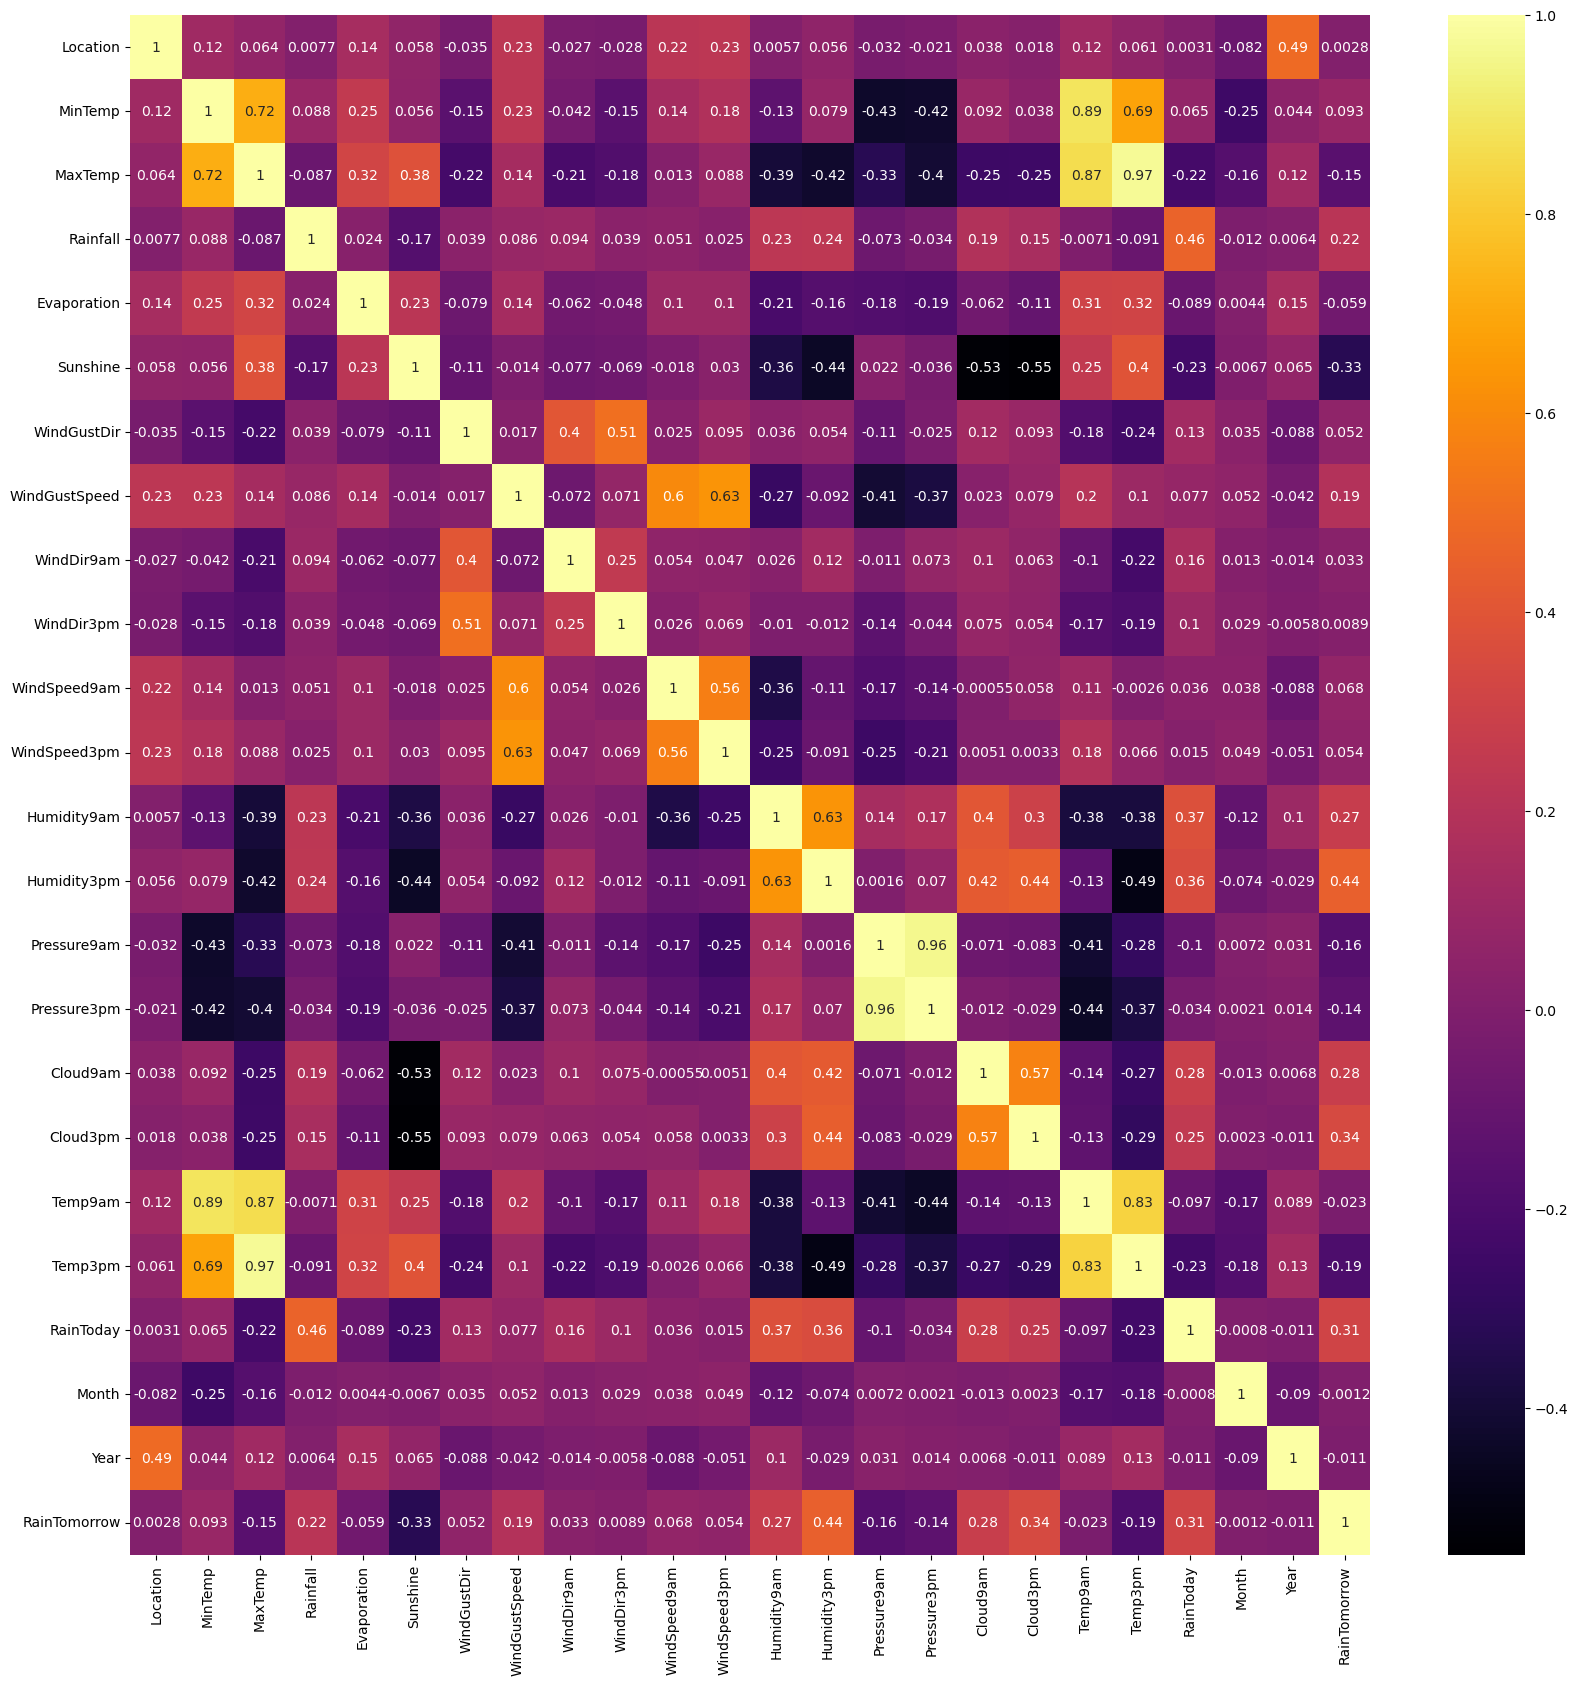

In [543]:
plt.figure(figsize=(20,20))
sns.heatmap(dfcor,annot=True,cmap='inferno')

Found the corelations of almost every features with our target variable for its contribution.

In [544]:
df.describe()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Month,Year,RainTomorrow
count,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,...,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000
mean,5.793591,13.193305,23.859976,2.805913,5.389395,7.632205,7.217804,40.174469,7.267418,7.810445,...,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934,0.236202,6.442136,2012.102433,0.236320
std,3.162654,5.379488,6.114516,10.309308,3.852004,2.825451,4.702616,13.776101,4.588045,4.430162,...,6.275759,6.217451,2.429205,2.299419,5.608301,5.945849,0.424773,3.437994,2.473137,0.424846
min,0.000000,-2.000000,8.200000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,...,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000,0.000000,1.000000,2008.000000,0.000000
25%,3.000000,9.300000,19.300000,0.000000,4.000000,7.632205,3.000000,31.000000,3.000000,4.000000,...,1014.000000,1011.400000,3.000000,3.000000,13.800000,18.100000,0.000000,3.000000,2010.000000,0.000000
50%,6.000000,13.200000,23.300000,0.000000,5.389395,7.632205,7.000000,40.174469,7.000000,8.000000,...,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.000000,0.000000,6.000000,2011.000000,0.000000
75%,8.000000,17.300000,28.000000,1.400000,5.389395,8.900000,12.000000,48.000000,12.000000,11.000000,...,1021.300000,1018.800000,7.000000,7.000000,21.900000,26.300000,0.000000,9.000000,2014.000000,0.000000
max,11.000000,28.500000,45.500000,371.000000,145.000000,13.900000,15.000000,107.000000,15.000000,15.000000,...,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000,1.000000,12.000000,2017.000000,1.000000


Mean and Median differences is very less of almost all the columns, so not very spreaded dataset. Outliers possibilites are there of some features.

Location            AxesSubplot(0.125,0.653529;0.0824468x0.226471)
MinTemp          AxesSubplot(0.223936,0.653529;0.0824468x0.226471)
MaxTemp          AxesSubplot(0.322872,0.653529;0.0824468x0.226471)
Rainfall         AxesSubplot(0.421809,0.653529;0.0824468x0.226471)
Evaporation      AxesSubplot(0.520745,0.653529;0.0824468x0.226471)
Sunshine         AxesSubplot(0.619681,0.653529;0.0824468x0.226471)
WindGustDir      AxesSubplot(0.718617,0.653529;0.0824468x0.226471)
WindGustSpeed    AxesSubplot(0.817553,0.653529;0.0824468x0.226471)
WindDir9am          AxesSubplot(0.125,0.381765;0.0824468x0.226471)
WindDir3pm       AxesSubplot(0.223936,0.381765;0.0824468x0.226471)
WindSpeed9am     AxesSubplot(0.322872,0.381765;0.0824468x0.226471)
WindSpeed3pm     AxesSubplot(0.421809,0.381765;0.0824468x0.226471)
Humidity9am      AxesSubplot(0.520745,0.381765;0.0824468x0.226471)
Humidity3pm      AxesSubplot(0.619681,0.381765;0.0824468x0.226471)
Pressure9am      AxesSubplot(0.718617,0.381765;0.0824468x0.226

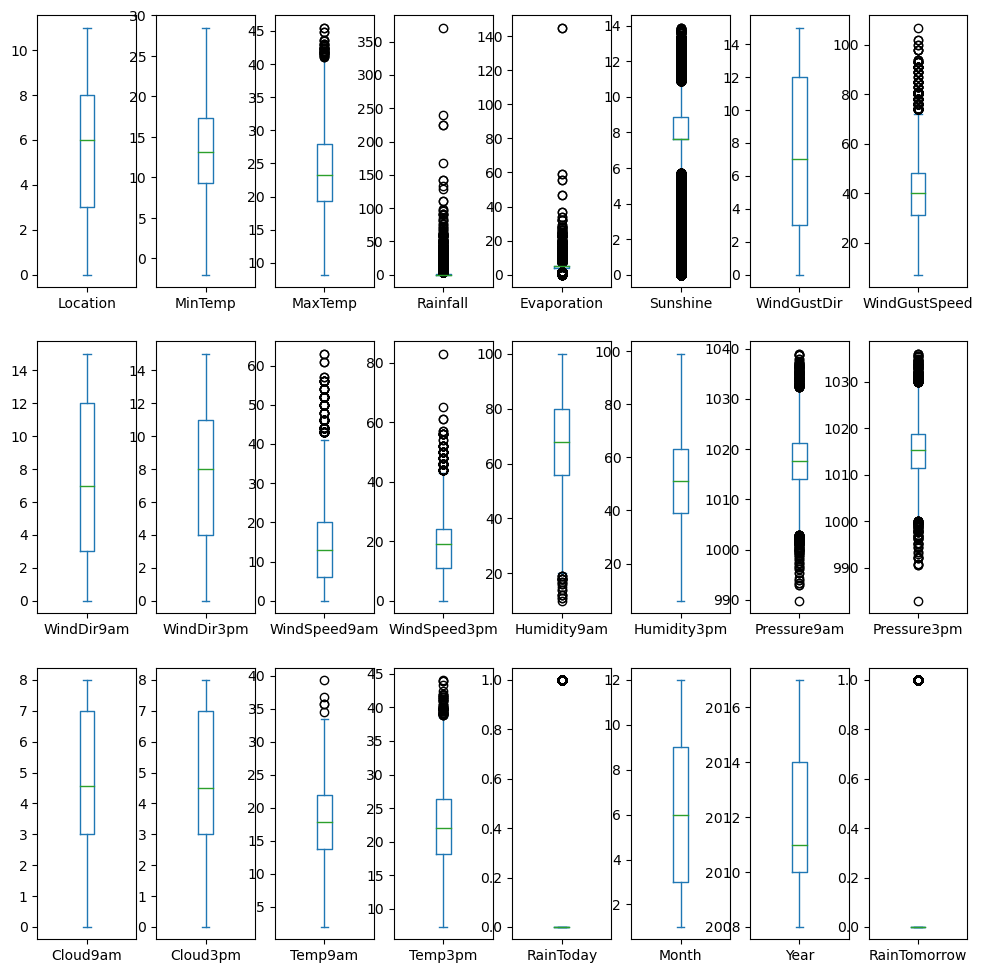

In [545]:
df.plot(kind='box',figsize=(12,12),layout=(3,8),subplots=True)

Outliers found in some of the columns, and trying to remove via absolute zscore method.

In [546]:
z=np.abs(zscore(df))
z

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Month,Year,RainTomorrow
0,1.515776,0.038425,1.570089e-01,0.213986,2.305893e-16,1.257472e-15,1.229643,0.277710,1.249535,1.397222,...,1.584003,1.308665,1.413459,3.862851e-16,0.153712,0.108138,0.556099,1.616696,1.658896,0.556282
1,1.515776,1.076989,2.028121e-01,0.272189,2.305893e-16,1.257472e-15,1.442303,0.277710,0.276260,1.622961,...,1.121880,1.196072,0.000000,3.862851e-16,0.100217,0.312348,0.556099,1.616696,1.658896,0.556282
2,1.515776,0.054526,3.009450e-01,0.272189,2.305893e-16,1.257472e-15,1.654964,0.422897,1.249535,1.622961,...,1.599939,1.051309,0.000000,1.088680e+00,0.577390,0.127334,0.556099,1.616696,1.658896,0.556282
3,1.515776,0.742365,6.771214e-01,0.272189,2.305893e-16,1.257472e-15,0.684299,1.174166,0.377652,1.763120,...,0.006411,0.391836,0.000000,3.862851e-16,0.060269,0.682376,0.556099,1.616696,1.658896,0.556282
4,1.515776,0.800625,1.380408e+00,0.175183,2.305893e-16,1.257472e-15,1.229643,0.059928,1.366114,0.182949,...,1.090010,1.485596,1.001777,1.520830e+00,0.006773,1.220599,0.556099,1.616696,1.658896,0.556282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,1.013895,1.932140,7.523137e-02,0.272189,2.305893e-16,1.257472e-15,1.534940,0.666009,0.377652,1.537381,...,1.109058,0.814518,0.000000,3.862851e-16,1.366273,0.007221,0.556099,0.128611,1.980423,0.556282
8421,1.013895,1.783418,2.355231e-01,0.272189,2.305893e-16,1.257472e-15,0.258979,1.319354,0.377652,1.085904,...,0.933770,0.621501,0.000000,3.862851e-16,1.223619,0.345987,0.556099,0.128611,1.980423,0.556282
8422,1.013895,1.448794,4.972110e-01,0.272189,2.305893e-16,1.257472e-15,0.896959,0.230447,0.377652,1.397222,...,0.535388,0.251553,0.000000,3.862851e-16,0.938310,0.615099,0.556099,0.128611,1.980423,0.556282
8423,1.013895,1.002628,5.135665e-01,0.272189,2.305893e-16,1.257472e-15,0.379002,0.883791,0.595623,1.085904,...,0.280424,0.203299,0.644950,1.088680e+00,0.474684,0.598279,0.556099,0.128611,1.980423,0.556282


In [547]:
cleaned_df=df[(z<3).all(axis=1)]
cleaned_df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Month,Year,RainTomorrow
0,1,13.4,22.900000,0.6,5.389395,7.632205,13,44.000000,13,14,...,1007.7,1007.1,8.000000,4.503183,16.9,21.8,0,12,2008,0
1,1,7.4,25.100000,0.0,5.389395,7.632205,14,44.000000,6,15,...,1010.6,1007.8,4.566622,4.503183,17.2,24.3,0,12,2008,0
2,1,12.9,25.700000,0.0,5.389395,7.632205,15,46.000000,13,15,...,1007.6,1008.7,4.566622,2.000000,21.0,23.2,0,12,2008,0
3,1,9.2,28.000000,0.0,5.389395,7.632205,4,24.000000,9,0,...,1017.6,1012.8,4.566622,4.503183,18.1,26.5,0,12,2008,0
4,1,17.5,32.300000,1.0,5.389395,7.632205,13,41.000000,1,7,...,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,12,2008,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,9,2.8,23.400000,0.0,5.389395,7.632205,0,31.000000,9,1,...,1024.6,1020.3,4.566622,4.503183,10.1,22.4,0,6,2017,0
8421,9,3.6,25.300000,0.0,5.389395,7.632205,6,22.000000,9,3,...,1023.5,1019.1,4.566622,4.503183,10.9,24.5,0,6,2017,0
8422,9,5.4,26.900000,0.0,5.389395,7.632205,3,37.000000,9,14,...,1021.0,1016.8,4.566622,4.503183,12.5,26.1,0,6,2017,0
8423,9,7.8,27.000000,0.0,5.389395,7.632205,9,28.000000,10,3,...,1019.4,1016.5,3.000000,2.000000,15.1,26.0,0,6,2017,0


In [548]:
df.shape

(8425, 24)

In [549]:
cleaned_df.shape

(7987, 24)

After cleaning the data we have lost only 5.20% of our data

Location            AxesSubplot(0.125,0.653529;0.0824468x0.226471)
MinTemp          AxesSubplot(0.223936,0.653529;0.0824468x0.226471)
MaxTemp          AxesSubplot(0.322872,0.653529;0.0824468x0.226471)
Rainfall         AxesSubplot(0.421809,0.653529;0.0824468x0.226471)
Evaporation      AxesSubplot(0.520745,0.653529;0.0824468x0.226471)
Sunshine         AxesSubplot(0.619681,0.653529;0.0824468x0.226471)
WindGustDir      AxesSubplot(0.718617,0.653529;0.0824468x0.226471)
WindGustSpeed    AxesSubplot(0.817553,0.653529;0.0824468x0.226471)
WindDir9am          AxesSubplot(0.125,0.381765;0.0824468x0.226471)
WindDir3pm       AxesSubplot(0.223936,0.381765;0.0824468x0.226471)
WindSpeed9am     AxesSubplot(0.322872,0.381765;0.0824468x0.226471)
WindSpeed3pm     AxesSubplot(0.421809,0.381765;0.0824468x0.226471)
Humidity9am      AxesSubplot(0.520745,0.381765;0.0824468x0.226471)
Humidity3pm      AxesSubplot(0.619681,0.381765;0.0824468x0.226471)
Pressure9am      AxesSubplot(0.718617,0.381765;0.0824468x0.226

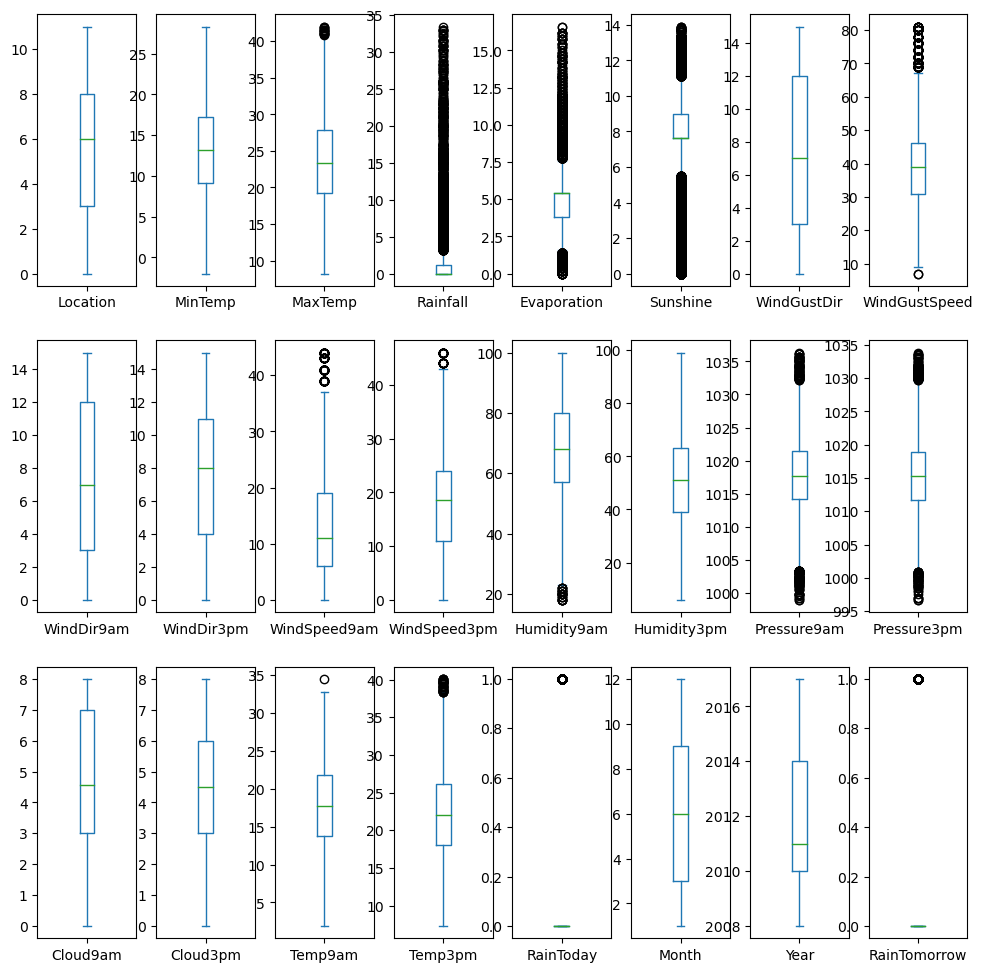

In [550]:
cleaned_df.plot(kind='box',figsize=(12,12),layout=(3,8),subplots=True)

In [551]:
x=cleaned_df.iloc[:,0:-1]

In [552]:
y=cleaned_df.iloc[:,-1]

In [553]:
x.shape

(7987, 23)

In [554]:
y.shape

(7987,)

After separating the independent & target variables, we are going to apply different classification algos with it

In [555]:
lg=LogisticRegression()

In [556]:
for i in range(0,50):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=i)
    lg.fit(xtrain,ytrain)
    pred1=lg.predict(xtest)
    ascore=accuracy_score(ytest,pred1)
    print(ascore)

0.8302044221944097
0.8272841051314143
0.8293700458906967
0.8318731748018356
0.8460575719649562
0.818523153942428
0.8251981643721318
0.8264497288277013
0.8327075511055486
0.8314559866499791
0.819357530246141
0.8218606591572799
0.8272841051314143
0.8293700458906967
0.8435544430538173
0.8277012932832708
0.833959115561118
0.833959115561118
0.83729662077597
0.8260325406758448
0.8393825615352524
0.8310387984981227
0.8281184814351272
0.8464747601168127
0.8343763037129746
0.8368794326241135
0.8256153525239883
0.8389653733833959
0.833959115561118
0.8385481852315394
0.83729662077597
0.8352106800166875
0.8314559866499791
0.8318731748018356
0.8327075511055486
0.8397997496871089
0.8281184814351272
0.8493950771798081
0.8218606591572799
0.8347934918648311
0.8226950354609929
0.8318731748018356
0.8385481852315394
0.8368794326241135
0.836462244472257
0.8393825615352524
0.8297872340425532
0.8393825615352524
0.836462244472257
0.838130997079683


In [557]:
dt=DecisionTreeClassifier()

In [558]:
for i in range(0,50):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=i)
    dt.fit(xtrain,ytrain)
    pred2=dt.predict(xtest)
    ascore=accuracy_score(ytest,pred2)
    print(ascore)

0.8322903629536921
0.8477263245723822
0.8231122236128494
0.8251981643721318
0.8489778890279516
0.8347934918648311
0.8377138089278264
0.8293700458906967
0.83729662077597
0.8385481852315394
0.8385481852315394
0.8231122236128494
0.8414685022945348
0.8268669169795578
0.8473091364205256
0.8435544430538173
0.8335419274092616
0.8556528994576554
0.8310387984981227
0.8468919482686692
0.8347934918648311
0.8402169378389653
0.8260325406758448
0.8410513141426783
0.8322903629536921
0.8493950771798081
0.8251981643721318
0.8302044221944097
0.8360450563204005
0.8327075511055486
0.8306216103462661
0.83729662077597
0.8156028368794326
0.8427200667501042
0.8460575719649562
0.8264497288277013
0.8514810179390905
0.8356278681685441
0.8393825615352524
0.8306216103462661
0.8327075511055486
0.8377138089278264
0.8335419274092616
0.8402169378389653
0.833124739257405
0.8402169378389653
0.8406341259908219
0.8464747601168127
0.8368794326241135
0.8264497288277013


In [559]:
rf=RandomForestClassifier()

In [560]:
for i in range(0,50):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=i)
    rf.fit(xtrain,ytrain)
    pred3=rf.predict(xtest)
    ascore=accuracy_score(ytest,pred3)
    print(ascore)

0.885273258239466
0.8898623279098874
0.8798498122653317
0.8919482686691698
0.904881101376721
0.8802670004171882
0.8902795160617438
0.8856904463913224
0.8848560700876095
0.8911138923654568
0.8873591989987485
0.8840216937838965
0.8815185648727576
0.8823529411764706
0.9002920317062996
0.8831873174801835
0.8881935753024615
0.8965373383395911
0.8948685857321652
0.886107634543179
0.8977889027951607
0.8906967042136004
0.8836045056320401
0.8986232790988736
0.8919482686691698
0.8944513975803087
0.8936170212765957
0.886107634543179
0.8894451397580309
0.8898623279098874
0.8877763871506049
0.8906967042136004
0.8877763871506049
0.885273258239466
0.8915310805173133
0.8927826449728827
0.8940342094284522
0.9011264080100125
0.8756779307467668
0.886107634543179
0.8865248226950354
0.8877763871506049
0.8977889027951607
0.885273258239466
0.886942010846892
0.8961201501877347
0.8931998331247393
0.8940342094284522
0.8886107634543179
0.886942010846892


In [561]:
kn=KNeighborsClassifier()

In [562]:
for i in range(0,50):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=i)
    kn.fit(xtrain,ytrain)
    pred4=kn.predict(xtest)
    ascore=accuracy_score(ytest,pred4)
    print(ascore)

0.836462244472257
0.8335419274092616
0.8327075511055486
0.8385481852315394
0.85273258239466
0.8335419274092616
0.8423028785982478
0.8377138089278264
0.8473091364205256
0.838130997079683
0.8314559866499791
0.8281184814351272
0.818523153942428
0.836462244472257
0.8460575719649562
0.8443888193575303
0.833959115561118
0.8489778890279516
0.8356278681685441
0.833959115561118
0.8443888193575303
0.8335419274092616
0.8352106800166875
0.8452231956612433
0.8360450563204005
0.8423028785982478
0.8314559866499791
0.8314559866499791
0.8439716312056738
0.8435544430538173
0.8477263245723822
0.8489778890279516
0.8272841051314143
0.8485607008760951
0.8423028785982478
0.8498122653316645
0.8468919482686692
0.8456403838130997
0.8256153525239883
0.8297872340425532
0.8318731748018356
0.8327075511055486
0.8397997496871089
0.833959115561118
0.8385481852315394
0.8356278681685441
0.833959115561118
0.833124739257405
0.8293700458906967
0.8443888193575303


By using above Algos, we found the Random Forest Classifier as the better Algo for our further process. So going to check the same by Cross Validation methods & Hyperparameter Tuning.

In [563]:
cv1=cross_val_score(rf,x,y,cv=KFold(n_splits=10))

In [564]:
cv1

array([0.86483104, 0.82853567, 0.8097622 , 0.90988736, 0.97747184,
       1.        , 0.96996245, 0.86716792, 0.86591479, 0.9122807 ])

In [565]:
cv1.mean()

0.9005813971725308

In [566]:
cv2=cross_val_score(rf,x,y,cv=StratifiedKFold(n_splits=10))

In [567]:
cv2

array([0.84730914, 0.83979975, 0.81727159, 0.88986233, 0.98998748,
       1.        , 0.97997497, 0.85839599, 0.85714286, 0.85839599])

In [568]:
cv2.mean()

0.8938140093663446

In [569]:
cv3=cross_val_score(rf,x,y,cv=ShuffleSplit(train_size=0.7,test_size=0.3,n_splits=10))

In [570]:
cv3

array([0.89361702, 0.88151856, 0.89528577, 0.88777639, 0.89027952,
       0.89111389, 0.88652482, 0.87609512, 0.89153108, 0.87943262])

In [571]:
cv3.mean()

0.8873174801835628

Getting a good predictions of approximately 89% by all the cross validation methods.

In [572]:
gs1=GridSearchCV(estimator=rf,param_grid={'n_estimators':[200,300],'max_depth':[None],'max_features':[4,5],'min_samples_split':[6],'warm_start':[False,True],'oob_score':[True,False]},scoring='accuracy',cv=6,n_jobs=-1)

In [573]:
gs1.fit(xtrain,ytrain)

GridSearchCV(cv=6, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None], 'max_features': [4, 5],
                         'min_samples_split': [6], 'n_estimators': [200, 300],
                         'oob_score': [True, False],
                         'warm_start': [False, True]},
             scoring='accuracy')

In [574]:
HyPred1=gs1.best_estimator_.predict(xtest)

In [575]:
accuracy_score(ytest,HyPred1)

0.8881935753024615

In [576]:
confusion_matrix(ytest,HyPred1)

array([[1800,   71],
       [ 197,  329]], dtype=int64)

Got above 88% prediction accuracy with our Hyperparameter Tuning model with better confusion matrix along with better True Positive values. So going to same the same ML model

In [577]:
pickle.dump(gs1, open('next_day_rain', 'wb'))

In [578]:
gs1_model=pickle.load(open('next_day_rain', 'rb'))

In [579]:
model_pred1=gs1_model.predict(xtest)

In [580]:
accuracy_score(ytest,model_pred1)

0.8881935753024615

Found the same above 88% accurate prediction with our saved classification ML Model.

Now we are going to make our Regression ML Model for the prediction of How Much it will Rain on Next Day.

In [581]:
cleaned_df.sample()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Month,Year,RainTomorrow
5077,5,8.3,15.1,1.4,1.2,0.6,15,35.0,15,12,...,1031.2,1030.6,4.566622,4.503183,11.1,14.0,1,5,2011,0


In [582]:
cleaned_dfr=pd.DataFrame(cleaned_df)

Saved our already cleaned data in a separate variable and going to shift our second Target Rainfall of the next day at the very last column

In [583]:
target2=cleaned_dfr.pop('Rainfall')

In [584]:
cleaned_dfr.shape

(7987, 23)

In [585]:
cleaned_dfr.insert(23, 'Rainfall', target2)

In [586]:
cleaned_dfr.sample()

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Month,Year,RainTomorrow,Rainfall
2997,10,14.2,24.2,5.8,6.7,10,39.0,10,10,19.0,...,1020.9,2.0,2.0,22.8,22.8,0,4,2016,1,0.0


In [587]:
cleaned_df.sample()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Month,Year,RainTomorrow
924,3,16.6,26.8,0.0,4.6,6.4,8,52.0,12,10,...,1020.2,1019.7,3.0,8.0,22.3,20.7,0,3,2009,1


In [588]:
cleaned_dfr.drop(['RainTomorrow'], axis=1, inplace=True)

Droped our 1st Target, as which is not required to predict our 2nd Target and going to separate the independent & 2nd target variables for applying different Regression Algorithms with various random states.

In [589]:
ax=cleaned_dfr.iloc[:,0:-1]

In [590]:
ay=cleaned_dfr.iloc[:,-1]

In [591]:
ax.shape

(7987, 22)

In [592]:
ay.shape

(7987,)

In [593]:
lr=LinearRegression()

In [594]:
for i in range(0,50):
    axtrain,axtest,aytrain,aytest=train_test_split(ax,ay,test_size=0.30,random_state=i)
    lr.fit(axtrain,aytrain)
    apred1=lr.predict(axtest)
    rscore=r2_score(aytest,apred1)
    print(rscore)

0.49474519927917426
0.4793482107985053
0.4767300827812312
0.4940752315185545
0.47675237470590004
0.47211461282146705
0.47532605935675465
0.46601670926832894
0.4851411263056503
0.4957228859098759
0.4884868864212194
0.48830199188346746
0.48538733771728393
0.4956973850456792
0.487883707298825
0.5057467445159594
0.4875219837050182
0.49709983866664686
0.48108504600083735
0.4905821976087592
0.48777078932887974
0.4687142882048977
0.46894386443794733
0.474748150620802
0.4942799106399003
0.5008536312352421
0.45940351246010724
0.4727191933080017
0.4724764485816415
0.47829902414873604
0.49851516644795235
0.49462945563375416
0.47884147258939014
0.4537278304056873
0.477089080090249
0.48348136426644595
0.4927501025413594
0.488332838847513
0.48165263751956
0.45727699237244557
0.489963977671498
0.49726289507965626
0.48102620191301027
0.48160516308073886
0.4913875996762539
0.49666776168667914
0.47495050330621025
0.48717598706088283
0.4939816032719476
0.4693858868951145


In [595]:
dr=DecisionTreeRegressor()

In [596]:
for i in range(0,50):
    axtrain,axtest,aytrain,aytest=train_test_split(ax,ay,test_size=0.30,random_state=i)
    dr.fit(axtrain,aytrain)
    apred2=dr.predict(axtest)
    rscore=r2_score(aytest,apred2)
    print(rscore)

0.23369299592679593
0.42029915626287784
0.41181191171822173
0.2888980586963058
0.2638524700722522
0.3498358409983181
0.21272282661372355
0.2014395437451858
0.3381490933943295
0.4099681232349127
0.36388400765145223
0.2880272408352833
0.40626535771893824
0.33347558630592933
0.39089551283648405
0.2797004190228337
0.3581947347498139
0.3667694518915454
0.339946050691992
0.3810925412091213
0.2316814872916425
0.3273184366320152
0.40640497354383676
0.4617448804358597
0.2206229475999567
0.3517134824274666
0.2620678399380103
0.3312715472204588
0.24978779697008935
0.3329190351001512
0.3490596704967065
0.3837785373385778
0.300221725271106
0.2095100409703473
0.3614984932401514
0.26668495746359455
0.40937446395783716
0.38842606786421274
0.31493692635750914
0.1960075152843358
0.28809865837269855
0.3375327111609585
0.26608840492846464
0.3594588011365597
0.27532317288221286
0.4377094713103137
0.31216500757631693
0.20232905596288897
0.3236197738609664
0.263657776885601


In [597]:
br=BayesianRidge()

In [598]:
for i in range(0,50):
    axtrain,axtest,aytrain,aytest=train_test_split(ax,ay,test_size=0.30,random_state=i)
    br.fit(axtrain,aytrain)
    apred3=br.predict(axtest)
    rscore=r2_score(aytest,apred3)
    print(rscore)

0.49483987079410463
0.4793077278192822
0.4768164438568818
0.4941535338770444
0.4769889385189745
0.472345592485357
0.47551782007839505
0.46615212759504576
0.4851662820995587
0.49561456565281403
0.48823024595969444
0.4882717221331413
0.48525933389807097
0.49577795886632137
0.4877471181727796
0.5057567776062172
0.4873411579752903
0.4968286915230691
0.48145640874577544
0.4906277458879288
0.487742874112185
0.4688579553937532
0.46889421526903163
0.47472068488325503
0.4940459128310909
0.5006659398238831
0.45972412335779456
0.4729359785324577
0.4724430456423062
0.47823035904235567
0.49818056332756133
0.4944180027423638
0.47868337539119765
0.45389945932773146
0.4771462930686101
0.48334486876318816
0.49262240193104645
0.48818392413818035
0.4815950522631436
0.4573272259188639
0.48988058870017737
0.4972238770163091
0.4808848234898411
0.48135846306331354
0.49153752978038456
0.4966538966106294
0.4753473200651792
0.4873819988714133
0.4937606889277828
0.4693208754921564


In [599]:
gb=GradientBoostingRegressor()

In [600]:
for i in range(0,50):
    axtrain,axtest,aytrain,aytest=train_test_split(ax,ay,test_size=0.30,random_state=i)
    gb.fit(axtrain,aytrain)
    apred4=gb.predict(axtest)
    rscore=r2_score(aytest,apred4)
    print(rscore)

0.5467954918178212
0.5598299883419064
0.5520311216421614
0.550729774397988
0.5395147098996824
0.5475570631865577
0.5336520843476316
0.5329438796667425
0.5375889228201821
0.5592989423956191
0.5245259109238318
0.5387897384278351
0.5591692263615229
0.5609740474742637
0.5501130521900145
0.5577835254653999
0.5568523349347646
0.5564972403562085
0.5557141318788239
0.5614222460521914
0.5547618243935777
0.5423358063296775
0.5355826875441765
0.5435921680436029
0.5473213925244018
0.5662365305902477
0.5154046823213255
0.5169011521360126
0.5325073524698514
0.5265634882377621
0.5525416224229331
0.5584425796145525
0.527867427430126
0.5035519332787071
0.548809040271524
0.5368243434033979
0.558126748770176
0.5600326882835098
0.536423837742448
0.514849708091854
0.5501841103963101
0.5493217754001026
0.5339902203261815
0.5418254308350419
0.5518628387391027
0.5538658006386163
0.5475060147722638
0.544269265038734
0.5515182742082669
0.49993205624336057


In [601]:
kr=KNeighborsRegressor()

In [602]:
for i in range(0,50):
    axtrain,axtest,aytrain,aytest=train_test_split(ax,ay,test_size=0.30,random_state=i)
    kr.fit(axtrain,aytrain)
    apred5=kr.predict(axtest)
    rscore=r2_score(aytest,apred5)
    print(rscore)

0.1698678339883798
0.2199151076110304
0.2569558215648313
0.10342882786449381
0.17032735149772327
0.1388043788998311
0.21712338732002912
0.18046017715800533
0.19516214333377557
0.1803260675291728
0.1792596415996044
0.2058485419355106
0.19884307631989717
0.1074403177269253
0.21795178215773314
0.23189948312944864
0.1963566162541448
0.18117280822554327
0.19378790487651498
0.16947445825356822
0.2170006617347655
0.16217232971365203
0.18705813246667313
0.1602811358980868
0.15720091480888398
0.18511067661566438
0.12164832885542498
0.1901254797379789
0.15759880873052523
0.1385265177952798
0.17302546428837828
0.2072375813097388
0.14397993320858593
0.13702815080144826
0.2237764012488469
0.18355447148332238
0.1808617837174522
0.21932152494639823
0.17388746695457036
0.1231708458378098
0.1954827810128158
0.16920452150152454
0.16767732363222876
0.2361172790217908
0.18982343372349775
0.19455490347628768
0.1603742831153585
0.15138885094649235
0.20943333213388238
0.16781715363018346


In [603]:
ar=AdaBoostRegressor()

In [604]:
for i in range(0,50):
    axtrain,axtest,aytrain,aytest=train_test_split(ax,ay,test_size=0.30,random_state=i)
    ar.fit(axtrain,aytrain)
    apred6=ar.predict(axtest)
    rscore=r2_score(aytest,apred6)
    print(rscore)

0.4126644732322269
0.40317915773101487
0.31820910971512884
0.3961322884768027
0.40432430381654016
0.35458369068573126
0.3909534645970868
0.3603799907876265
0.3713531634145032
0.32812581379807204
0.4218656606301583
0.38890721526375427
0.4243415486841029
0.35851063292586727
0.429002208719409
0.4146162186804988
0.39985297665983666
0.42782536198729104
0.379096299254262
0.29367397522721395
0.3902284670156658
0.36076729881697667
0.38861633099106674
0.42618991132171824
0.45478433313379363
0.47113536671008627
0.31870733658101713
0.3192061725338543
0.3764417299849925
0.410346759364714
0.43315913777466064
0.42608826222737206
0.4211673816920095
0.3704258457919837
0.34061865547350145
0.42861577264740247
0.3550587584716861
0.3901783519728518
0.39190973998113365
0.40190878335285296
0.41902337865799344
0.38162094336949937
0.406205425770212
0.4666732293568525
0.36944352286495796
0.41022544895651636
0.30286552849369774
0.3333897203250783
0.4468629510083032
0.3353121812029506


In [605]:
fr=RandomForestRegressor()

In [606]:
for i in range(0,50):
    axtrain,axtest,aytrain,aytest=train_test_split(ax,ay,test_size=0.30,random_state=i)
    fr.fit(axtrain,aytrain)
    apred7=fr.predict(axtest)
    rscore=r2_score(aytest,apred7)
    print(rscore)

0.6367769427740203
0.6480246737399996
0.6587985706116561
0.6195694445195825
0.640118767206058
0.6015437769336576
0.6167821448417563
0.6028364218142346
0.6245418251284085
0.6507872221084547
0.6137048490684505
0.6101996009438364
0.6471122820094652
0.6445242627786256
0.6225374745251774
0.6313157861962186
0.6351804024435884
0.6557534234695042
0.6492438328579149
0.6281979390874035
0.648756185718905
0.6456697274139591
0.6366224046236612
0.6189351467481885
0.6112276120420737
0.6584616940254044
0.5744408048282628
0.5853805621513188
0.6210216215167451
0.6032223151693092
0.6189498988376488
0.6544069377233116
0.5946317489090649
0.5900701346976664
0.6243409247285421
0.5998970591702236
0.6491184212884338
0.6336088925850649
0.6159567048009211
0.619552862040232
0.6282520205333484
0.6439392887381821
0.6137739743071109
0.6028271794849347
0.6229391024072901
0.6254822398762316
0.6283788577499285
0.6173205318900672
0.6293549761309906
0.588923008863341


In [607]:
en=ElasticNet(alpha=0.1,l1_ratio=0.5)

In [608]:
for i in range(0,50):
    axtrain,axtest,aytrain,aytest=train_test_split(ax,ay,test_size=0.30,random_state=i)
    en.fit(axtrain,aytrain)
    apred8=en.predict(axtest)
    rscore=r2_score(aytest,apred8)
    print(rscore)

0.4669368056356852
0.44953852981803266
0.4515376139500765
0.46540348219236083
0.45804901258987474
0.452947188581336
0.4573695905834455
0.44199592372867
0.45678750702198634
0.45979350259665164
0.44928856299516395
0.45935998980386605
0.4513612407119717
0.46868038658636946
0.4541654059032725
0.4775987626513095
0.4529482354713148
0.459645121245449
0.4637715822513748
0.4637620069114038
0.45789799725826186
0.44643058651709977
0.43954851787581184
0.4463925484768575
0.4580703793145732
0.46662287188387574
0.44102051036111134
0.45206981890692444
0.4428220493279055
0.4482917685817869
0.45738689850947556
0.45987006271514375
0.4463698544492698
0.4298800079279096
0.45272480408916804
0.4505905033075709
0.45850365681778216
0.4549953284574897
0.4501851504724872
0.43082396015932045
0.45948928364241215
0.4657360907014525
0.44659619573889453
0.4459420305101892
0.4675163994539021
0.46679594682348635
0.4606942130601447
0.462605580933506
0.45813677155375565
0.4365449890946188


In [609]:
ls=Lasso(alpha=0.1)

In [610]:
for i in range(0,50):
    axtrain,axtest,aytrain,aytest=train_test_split(ax,ay,test_size=0.30,random_state=i)
    ls.fit(axtrain,aytrain)
    apred9=ls.predict(axtest)
    rscore=r2_score(aytest,apred9)
    print(rscore)

0.4921670997477058
0.47594992900873456
0.4750921787283954
0.49227570731061754
0.47919810031337184
0.47199464793104073
0.4784370490249542
0.4648669856242085
0.48109301893919587
0.4894732520300167
0.4808509248735725
0.4850126820297337
0.47917337679771765
0.4955361633083012
0.4819903730894004
0.5012989384977116
0.4815401266203966
0.4922591503049294
0.4820289338114193
0.4876563588344237
0.4838882128893386
0.46790129601498787
0.4666570650048676
0.4677921252410637
0.48795064360408325
0.4962506916807192
0.4599149693069987
0.4723899510563849
0.47149215203464145
0.47647928231881287
0.4906576088310417
0.4897796266605169
0.47551369366637364
0.4526992272599023
0.47492199049009787
0.47839081471807454
0.48942603969497056
0.48205370891166655
0.4797703469207697
0.4557272471567443
0.48541631493122417
0.4941041387625995
0.4748774948959241
0.475983399503936
0.4901091748571119
0.492550272431002
0.47976733065620725
0.48653886320056816
0.4871972384113853
0.46412103699877283


In [611]:
rg=Ridge(alpha=0.1)

In [612]:
for i in range(0,50):
    axtrain,axtest,aytrain,aytest=train_test_split(ax,ay,test_size=0.30,random_state=i)
    rg.fit(axtrain,aytrain)
    apred10=rg.predict(axtest)
    rscore=r2_score(aytest,apred10)
    print(rscore)

0.49474738165917664
0.47934762396546915
0.4767321563735155
0.49407711343193494
0.4767574460440406
0.4721198714472522
0.4753303132662273
0.4660198362351553
0.48514191350539326
0.49572104850721943
0.4884819967529993
0.4883016470649678
0.48538492225235974
0.4956992470890832
0.4878811623379199
0.5057472091780022
0.4875185307424382
0.4970948005593212
0.48109299754811063
0.490583395561481
0.48777048138695767
0.46871755324858433
0.4689430854804104
0.47474779965887615
0.4942754414786248
0.5008501684168698
0.4594105511730596
0.47272390918711416
0.47247606006813003
0.4782979156093583
0.49850889901304385
0.49462542944247967
0.47883845588898866
0.4537317117874521
0.4770905287469034
0.483478844359136
0.4927479060371943
0.48833007563989284
0.4816517760300888
0.4572783066584234
0.48996252803349194
0.49726240743899697
0.48102354132837755
0.4816002896014445
0.4913909654190447
0.49666776154243486
0.4749588764315267
0.4871804573760229
0.49397748417660925
0.4693847932836047


By using & checking all the above Regressor Algos, we found the Random Forest Regressor as better than others but not a very good one. So further going to check the same with cross validation and Hyperparameter Tuning.

In [613]:
cv4=cross_val_score(fr,ax,ay,cv=ShuffleSplit(train_size=0.7,test_size=0.3,n_splits=10))

In [614]:
cv4

array([0.61635843, 0.60690392, 0.6323432 , 0.65919525, 0.60473208,
       0.60032155, 0.62071978, 0.61025075, 0.60162236, 0.64110813])

In [615]:
cv4.mean()

0.6193555440438587

In [616]:
cv5=cross_val_score(fr,ax,ay,cv=KFold(n_splits=10))

In [617]:
cv5

array([0.50026961, 0.47222464, 0.48495662, 0.70839716, 0.86420042,
       0.92687376, 0.85777201, 0.59746197, 0.52871035, 0.56936401])

In [618]:
cv5.mean()

0.6510230544345414

Got above 92% prediction accuracy with KFold Cross Validation's 6 Split as above.

In [619]:
gs2=GridSearchCV(estimator=fr,param_grid={'n_estimators':[200],'max_depth':[20],'max_features':['sqrt'],'min_samples_leaf':[5],'min_samples_split':[5],'bootstrap':[False]},scoring='accuracy',cv=10)

In [620]:
gs2.fit(axtrain,aytrain)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [False], 'max_depth': [20],
                         'max_features': ['sqrt'], 'min_samples_leaf': [5],
                         'min_samples_split': [5], 'n_estimators': [200]},
             scoring='accuracy')

In [621]:
Hypred2=gs2.best_estimator_.predict(axtest)

In [622]:
r2_score(aytest,Hypred2)

0.5873174373404995

In [623]:
pickle.dump(gs2, open('Next_Day_Rain_mm', 'wb'))

In [624]:
rain_mm_model=pickle.load(open('Next_Day_Rain_mm', 'rb'))

In [625]:
rain_mm_model_pred=rain_mm_model.predict(axtest)

In [626]:
r2_score(aytest,rain_mm_model_pred)

0.5873174373404995

In [627]:
mean_squared_error(aytest,rain_mm_model_pred)

9.701540255424147

In [628]:
mean_absolute_error(aytest,rain_mm_model_pred)

1.3014368829062868

We have saved our gs1 Regression ML Model for the prediction of how much it will Rain on next day, and got only 59% approximate prediction accuracy with 1.30 MAE.

In [629]:
gs1_model=pickle.load(open('next_day_rain', 'rb'))

In [630]:
model_pred1=gs1_model.predict(xtest)

In [631]:
accuracy_score(ytest,model_pred1)

0.8881935753024615

In [632]:
confusion_matrix(ytest,model_pred1)

array([[1800,   71],
       [ 197,  329]], dtype=int64)

As our earlier saved classification ML Model, we are again got a good prediction accuracy of approximately 89% for the prediction of whether it will Rain or not on the next day.